# Loading in data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("~/code/akahrs/LoL-Final-Project/data_cleaned/team_data_cleaned_2022.csv")

## Filter for major leagues

In [3]:
ImportantLEAGUES=['LPL', 'NA LCS', 'EU LCS', 'LEC', 'LMS', 'LCK', 'LCS', 'PCS']

In [4]:
df_major = df[df["league"].isin(ImportantLEAGUES)]

In [5]:
df_major

,Unnamed: 0,league,side,teamname,gamelength,result,teamdeaths,firstblood,team kpm,dragons,barons,dpm,damagetakenperminute,vspm,earned gpm,monsterkills,structures
572,572,LPL,Blue,Oh My God,1365,1,6,0.0,0.5714,2.0,1.0,1762.0220,2263.2527,7.1209,1326.0220,172.0,9.0
573,573,LPL,Red,ThunderTalk Gaming,1365,0,13,1.0,0.2637,1.0,0.0,1337.0110,2541.8901,6.8132,1021.4066,116.0,3.0
576,576,LPL,Blue,Oh My God,1444,1,9,1.0,0.9141,2.0,1.0,2482.5208,3026.0526,7.4792,1586.2604,178.0,10.0
577,577,LPL,Red,ThunderTalk Gaming,1444,0,22,0.0,0.3324,1.0,0.0,1459.6537,3107.1607,6.6066,1040.7756,115.0,2.0
580,580,LPL,Blue,FunPlus Phoenix,1893,1,8,0.0,0.3803,4.0,2.0,1719.9366,2528.4945,8.6846,1373.1854,264.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22647,22647,LCS,Red,Evil Geniuses,2112,0,16,0.0,0.2841,2.0,1.0,1808.5227,3047.3295,6.1080,1051.9034,207.0,4.0
22648,22648,LCS,Blue,Cloud9,2249,0,16,1.0,0.3201,1.0,0.0,2275.1979,3691.4807,7.3099,1042.2232,230.0,3.0
22649,22649,LCS,Red,Evil Geniuses,2249,1,12,0.0,0.4269,4.0,1.0,2955.9271,3225.2735,7.1498,1190.7159,205.0,11.0
22650,22650,LCS,Blue,Cloud9,2065,1,7,0.0,0.4068,4.0,1.0,2163.7482,2677.2203,8.6005,1159.1477,260.0,7.0


In [6]:
df_major = df_major.drop(columns=["Unnamed: 0"])

In [7]:
df_major_num = df_major

## Dropping more features

In [8]:
df_major_num["big_monsters_taken"] = df_major_num["dragons"] + df_major_num["barons"]

In [9]:
df_major_num = df_major.drop(columns=["dragons", "barons", "league", "teamname", "damagetakenperminute"])

In [10]:
df_major_num["side"] = df_major_num["side"].map(lambda x: 1 if x == "Blue" else 0)

In [11]:
df_major_num

,side,gamelength,result,teamdeaths,firstblood,team kpm,dpm,vspm,earned gpm,monsterkills,structures,big_monsters_taken
572,1,1365,1,6,0.0,0.5714,1762.0220,7.1209,1326.0220,172.0,9.0,3.0
573,0,1365,0,13,1.0,0.2637,1337.0110,6.8132,1021.4066,116.0,3.0,1.0
576,1,1444,1,9,1.0,0.9141,2482.5208,7.4792,1586.2604,178.0,10.0,3.0
577,0,1444,0,22,0.0,0.3324,1459.6537,6.6066,1040.7756,115.0,2.0,1.0
580,1,1893,1,8,0.0,0.3803,1719.9366,8.6846,1373.1854,264.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22647,0,2112,0,16,0.0,0.2841,1808.5227,6.1080,1051.9034,207.0,4.0,3.0
22648,1,2249,0,16,1.0,0.3201,2275.1979,7.3099,1042.2232,230.0,3.0,1.0
22649,0,2249,1,12,0.0,0.4269,2955.9271,7.1498,1190.7159,205.0,11.0,5.0
22650,1,2065,1,7,0.0,0.4068,2163.7482,8.6005,1159.1477,260.0,7.0,5.0


# Processing

In [12]:
#import all necessary scaler and transformers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

## Adding preprocessing

In [13]:
#Lets create a pipeline and Preprocessor for num and cat variables
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore',sparse=True)

In [14]:
preproc = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=['int64', 'float64'])),
    (cat_transformer, make_column_selector(dtype_include=['object','bool'])),
    remainder='passthrough'
)

## Run preprocessing

In [15]:
pipe = make_pipeline(preproc)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc78bb036d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc78bb03700>)]))])

In [16]:
X = pipe.fit_transform(df_major_num)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000498,-1.690847,1.0,-0.994703,-0.998507,0.800061,-0.428766,-0.423757,0.966322,-0.732274,0.452735,0.028276
1,-0.999502,-1.690847,-1.0,0.062823,1.001495,-0.592528,-1.306084,-0.700698,-0.607827,-1.858497,-0.865904,-1.037977
2,1.000498,-1.458105,1.0,-0.541478,1.001495,2.351053,1.058505,-0.101275,2.311146,-0.611607,0.672508,0.028276
3,-0.999502,-1.458105,-1.0,1.422498,-0.998507,-0.281606,-1.052922,-0.886645,-0.507735,-1.878608,-1.085678,-1.037977
4,1.000498,-0.135304,1.0,-0.692553,-0.998507,-0.064820,-0.515640,0.983627,1.210047,1.117951,1.331828,1.627656
...,...,...,...,...,...,...,...,...,...,...,...,...
4011,-0.999502,0.509893,-1.0,0.516048,-0.998507,-0.500202,-0.332778,-1.335403,-0.450230,-0.028384,-0.646131,0.028276
4012,1.000498,0.913510,-1.0,0.516048,1.001495,-0.337273,0.630544,-0.253651,-0.500254,0.434172,-0.865904,-1.037977
4013,-0.999502,0.913510,1.0,-0.088253,-0.998507,0.146082,2.035722,-0.397746,0.267106,-0.068606,0.892281,1.094529
4014,1.000498,0.371426,1.0,-0.843628,-0.998507,0.055114,0.400487,0.907934,0.103972,1.037506,0.013189,1.094529


# Model

## Fit model

In [17]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [18]:
af = AffinityPropagation(preference=-1080, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_


n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print(
    #"Adjusted Mutual Information: %0.3f"
    #% metrics.adjusted_mutual_info_score(labels_true, labels)
#print(
    #"Silhouette Coefficient: %0.3f"
    #% metrics.silhouette_score(X, labels, metric="sqeuclidean")

Estimated number of clusters: 9


## Visualize results

### Simple viz

In [19]:
figures = [[0,1], [0,2], [0,3], [0,4], [1,2], [1,3], [1,4], [2,3], [2,4], [3,4]]

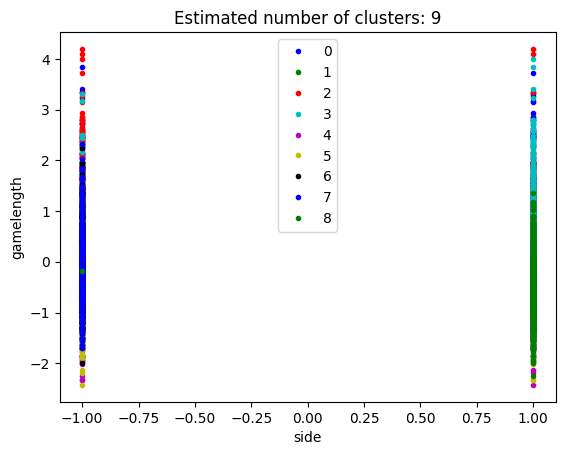

In [20]:
import matplotlib.pyplot as plt
from itertools import cycle

#plt.close("all")
#plt.figure(1)
#plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
#for i in range(n_clusters_):
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".", label=np.unique(af.labels_)[k])
    #plt.plot(
        #cluster_center[2],
        #cluster_center[4],
        #"o",
        #markerfacecolor=col,
        #markeredgecolor="k",
        #markersize=14,
    #)
plt.legend()
plt.xlabel(df_major_num.columns[0])
plt.ylabel(df_major_num.columns[1])
    #for x in X[class_members]:
        #plt.plot([cluster_center[2], x[2]], [cluster_center[4], x[4]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### Advanced viz

In [21]:
X_t = pd.DataFrame(X, columns=df_major_num.columns)
X_t["clusters"] = af.labels_

In [22]:
X_mean = pd.concat([pd.DataFrame(X_t.mean().drop('clusters'), columns=['mean']), 
                   X_t.groupby('clusters').mean().T], axis=1)

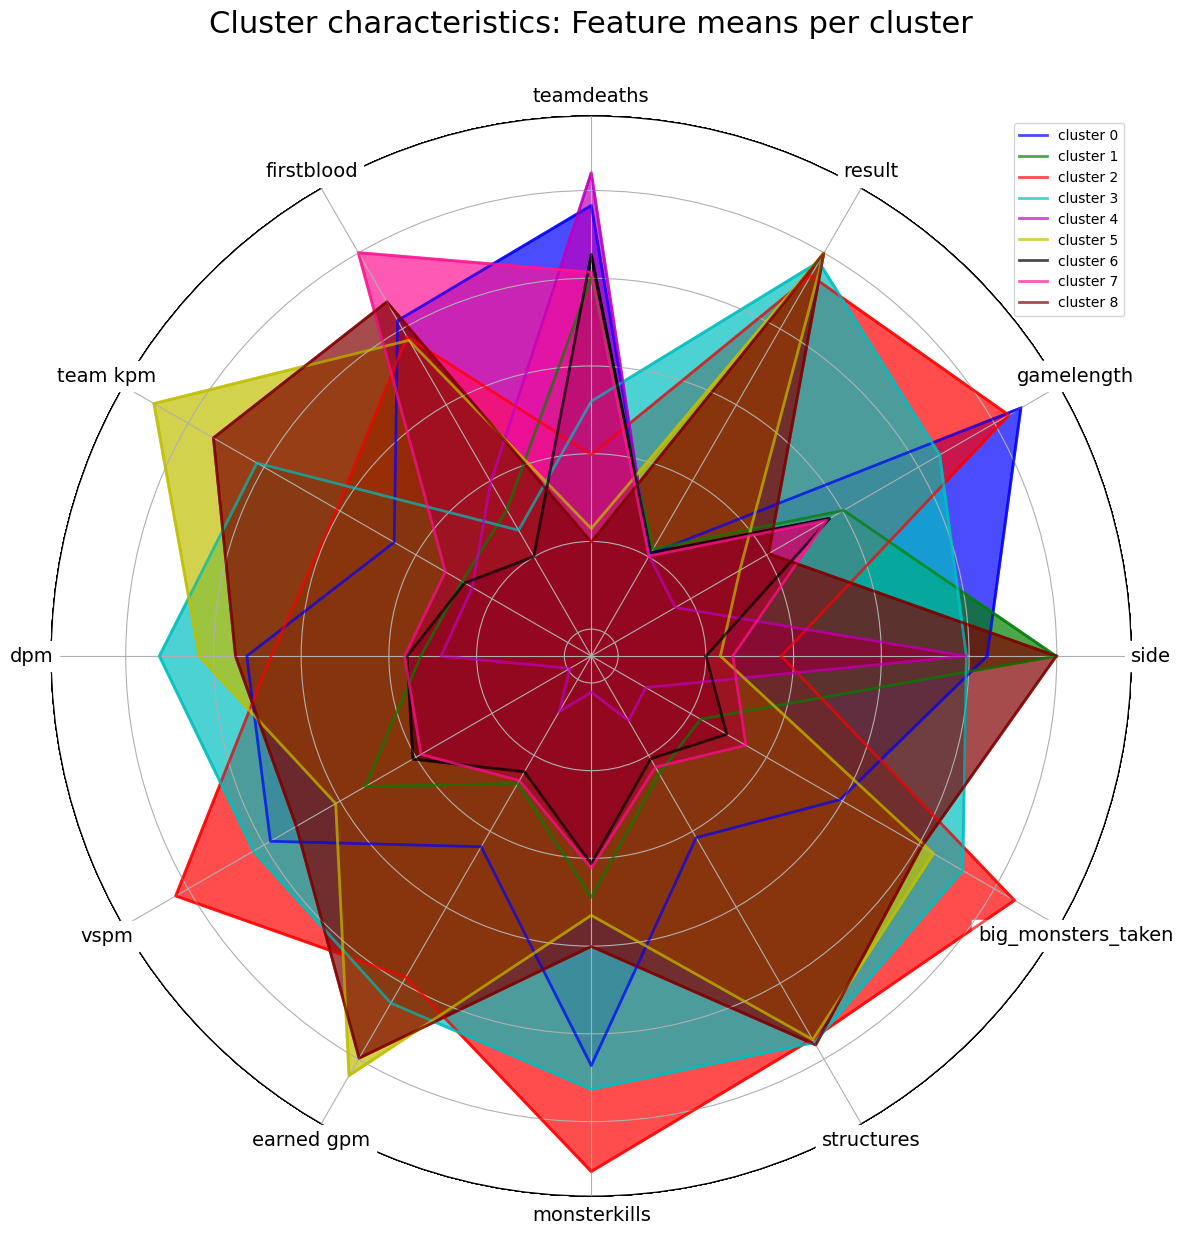

In [23]:
cluster_colors = ['b', 'g', 'r', 'c', "m", "y", "k", "deeppink", "maroon"]

class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)
        
        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])
        
        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)
                     
    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

fig = plt.figure(figsize=(12, 12))
no_features = af.n_features_in_
radar = Radar(fig, list(df_major_num.columns), np.unique(af.labels_))

for k in range(0,len(np.unique(af.labels_))):
    cluster_data = X_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend(loc="upper right")
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()

## Make predictions

In [24]:
predictions = af.predict(X)

# Classifying teams per match

In [25]:
df_major.reset_index(inplace=True, drop=True)

In [26]:
df_major_class = df_major.join(pd.DataFrame(predictions))
df_major_class = df_major_class.rename(columns={0: "cluster"})

In [27]:
df_major_class

,league,side,teamname,gamelength,result,teamdeaths,firstblood,team kpm,dragons,barons,dpm,damagetakenperminute,vspm,earned gpm,monsterkills,structures,big_monsters_taken,cluster
0,LPL,Blue,Oh My God,1365,1,6,0.0,0.5714,2.0,1.0,1762.0220,2263.2527,7.1209,1326.0220,172.0,9.0,3.0,8
1,LPL,Red,ThunderTalk Gaming,1365,0,13,1.0,0.2637,1.0,0.0,1337.0110,2541.8901,6.8132,1021.4066,116.0,3.0,1.0,7
2,LPL,Blue,Oh My God,1444,1,9,1.0,0.9141,2.0,1.0,2482.5208,3026.0526,7.4792,1586.2604,178.0,10.0,3.0,8
3,LPL,Red,ThunderTalk Gaming,1444,0,22,0.0,0.3324,1.0,0.0,1459.6537,3107.1607,6.6066,1040.7756,115.0,2.0,1.0,4
4,LPL,Blue,FunPlus Phoenix,1893,1,8,0.0,0.3803,4.0,2.0,1719.9366,2528.4945,8.6846,1373.1854,264.0,13.0,6.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,LCS,Red,Evil Geniuses,2112,0,16,0.0,0.2841,2.0,1.0,1808.5227,3047.3295,6.1080,1051.9034,207.0,4.0,3.0,6
4012,LCS,Blue,Cloud9,2249,0,16,1.0,0.3201,1.0,0.0,2275.1979,3691.4807,7.3099,1042.2232,230.0,3.0,1.0,0
4013,LCS,Red,Evil Geniuses,2249,1,12,0.0,0.4269,4.0,1.0,2955.9271,3225.2735,7.1498,1190.7159,205.0,11.0,5.0,3
4014,LCS,Blue,Cloud9,2065,1,7,0.0,0.4068,4.0,1.0,2163.7482,2677.2203,8.6005,1159.1477,260.0,7.0,5.0,3


In [28]:
check = pd.DataFrame(df_major_class[df_major_class["teamname"] == "Rogue"]["cluster"]).groupby("cluster")["cluster"].count()

In [29]:
pd.DataFrame(check)

,cluster
cluster,
0,5
1,4
2,3
3,7
4,1
5,12
6,6
7,3
8,12


# Deducting general playstyle of last X games

## Selecting team

In [30]:
def get_playstyle(team, n_games):
        find_last = pd.DataFrame(df_major_class[df_major_class["teamname"] == team]).tail(n_games).groupby("cluster")["league"].count()
        find_last = pd.DataFrame(find_last)
        cluster = find_last["league"].idxmax()
        find_last = find_last.drop(cluster)
        cluster2 = find_last["league"].idxmax()
        return [cluster, cluster2]

In [31]:
get_playstyle("Gen.G", 10)

[3, 2]

## Visualize playstyle of team's last X games

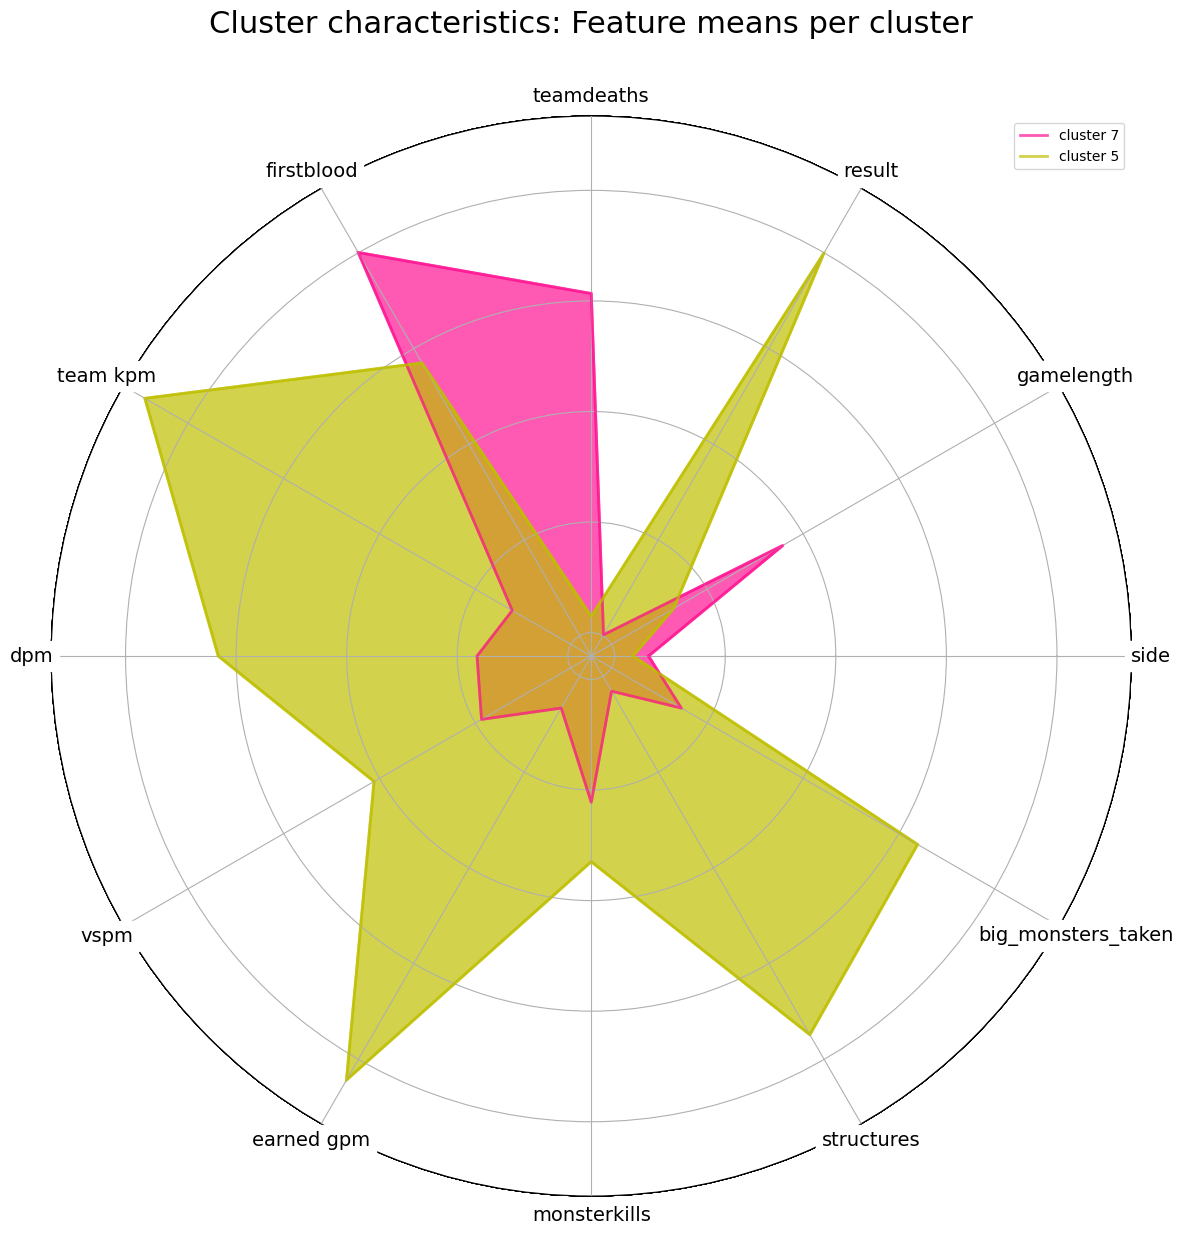

In [32]:
fig = plt.figure(figsize=(12, 12))
no_features = af.n_features_in_
radar = Radar(fig, list(df_major_num.columns), np.unique(af.labels_))

for k in get_playstyle("T1", 10):
    cluster_data = X_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend(loc="upper right")
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()

## Saving all teams' two most frequent playstyles of last X games

In [33]:
teams_playstyles = {i: get_playstyle(i, 10) for i in list(df_major_class["teamname"].unique())}
teams_playstyles 

{'Oh My God': [4, 8],
 'ThunderTalk Gaming': [8, 6],
 'FunPlus Phoenix': [3, 0],
 'Royal Never Give Up': [5, 1],
 'JD Gaming': [3, 2],
 'EDward Gaming': [0, 8],
 'LGD Gaming': [3, 4],
 "Anyone's Legend": [4, 7],
 'DRX': [4, 0],
 'Liiv SANDBOX': [5, 0],
 'Rare Atom': [1, 2],
 'Top Esports': [2, 5],
 'T1': [7, 5],
 'Kwangdong Freecs': [4, 0],
 'Ultra Prime': [6, 7],
 'LNG Esports': [6, 8],
 'Nongshim RedForce': [8, 5],
 'Hanwha Life Esports': [6, 1],
 'Invictus Gaming': [8, 0],
 'KT Rolster': [6, 3],
 'DWG KIA': [2, 3],
 'Team WE': [7, 4],
 'Weibo Gaming': [6, 3],
 'Gen.G': [3, 2],
 'Fredit BRION': [7, 2],
 'MAD Lions': [6, 8],
 'Team Vitality': [8, 0],
 'Rogue': [0, 2],
 'SK Gaming': [3, 4],
 'Excel Esports': [0, 3],
 'G2 Esports': [5, 8],
 'Astralis': [6, 3],
 'Misfits Gaming': [8, 0],
 'Fnatic': [2, 1],
 'Team BDS': [4, 6],
 'TSM': [3, 7],
 '100 Thieves': [3, 5],
 'Cloud9': [3, 0],
 'Golden Guardians': [6, 1],
 'FlyQuest': [4, 7],
 'Dignitas': [6, 0],
 'Team Liquid': [5, 0],
 'Counter

## Calculating average playstyle for team of past X games

In [34]:
test = df_major_class[df_major_class["teamname"] == "DWG KIA"].tail(10).groupby("teamname").aggregate(
{
     "side": "first",
    "gamelength": "mean",
    "result": "mean",
    "teamdeaths": "mean",
    "firstblood": "mean",
    "team kpm": "mean",
    "dpm": "mean",
    "vspm": "mean",
    "earned gpm": "mean",
    "monsterkills": "mean",
    "structures": "mean",
    "big_monsters_taken": "mean"
}
)

In [35]:
test["side"] = test["side"].map(lambda x: 1 if x == "Blue" else 0)

In [36]:
af.predict(test)[0]

/home/akahrs/.pyenv/versions/3.8.12/envs/LoL-Final-Project/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AffinityPropagation was fitted without feature names
  warnings.warn(


3

/home/akahrs/.pyenv/versions/3.8.12/envs/LoL-Final-Project/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AffinityPropagation was fitted without feature names
  warnings.warn(


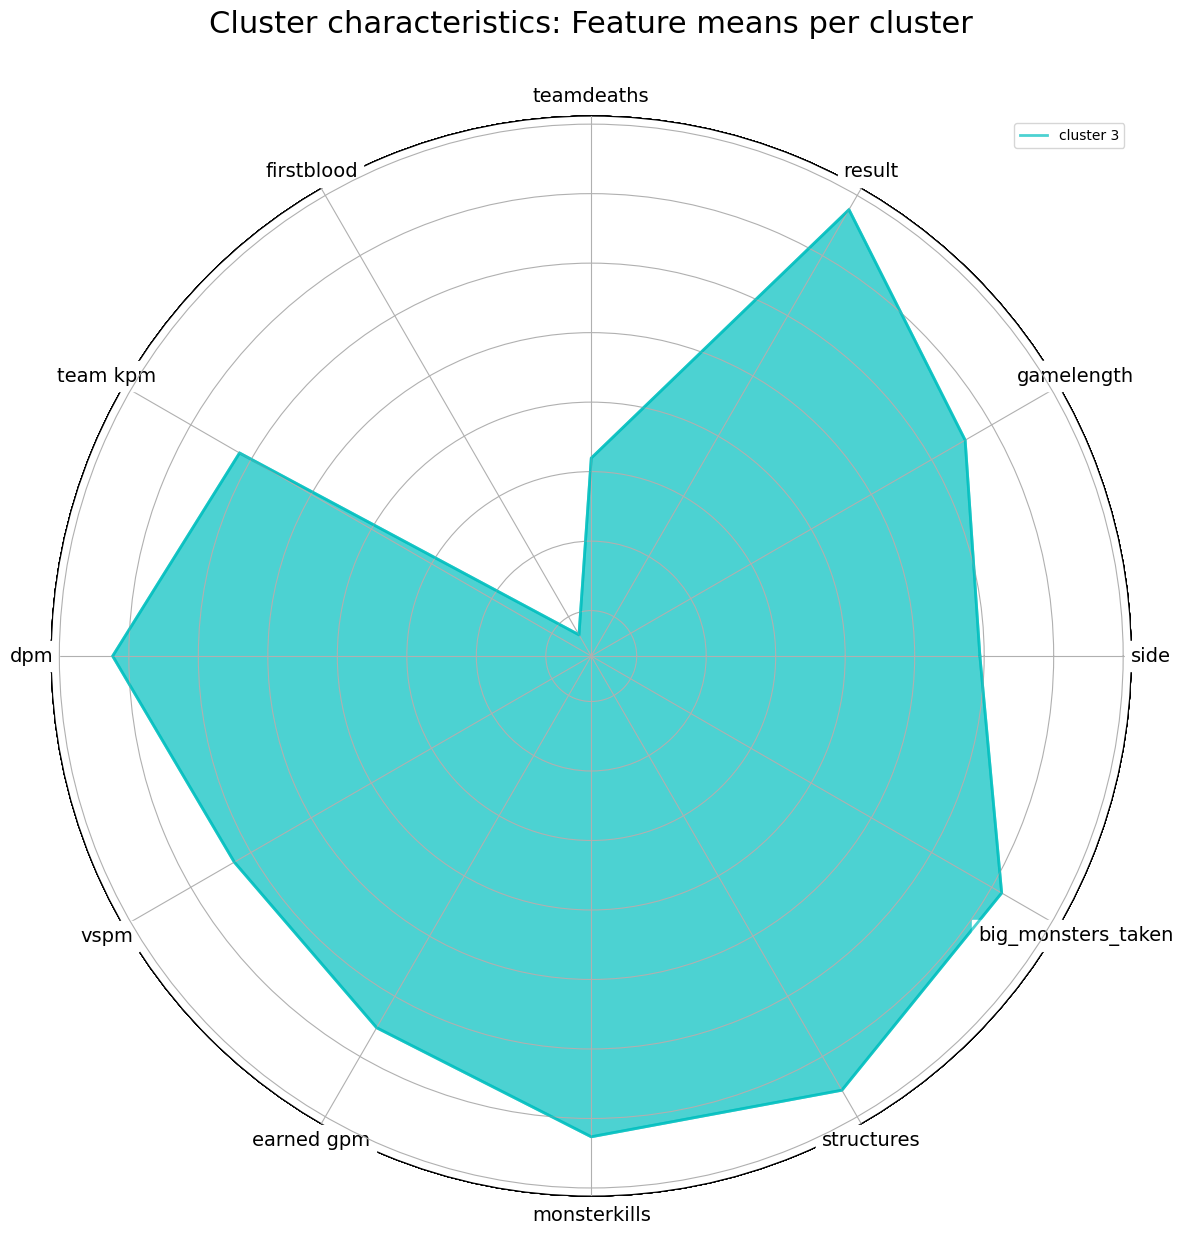

In [37]:
fig = plt.figure(figsize=(12, 12))
no_features = af.n_features_in_
radar = Radar(fig, list(df_major_num.columns), np.unique(af.labels_))

for k in af.predict(test):
    cluster_data = X_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend(loc="upper right")
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()

# Alternative model (clustering per team's mean of last X games)

## Creating teams' mean data of last X games

In [255]:
df_major

,league,side,teamname,gamelength,result,teamdeaths,firstblood,team kpm,dragons,barons,dpm,damagetakenperminute,vspm,earned gpm,monsterkills,structures,big_monsters_taken
0,LPL,Blue,Oh My God,1365,1,6,0.0,0.5714,2.0,1.0,1762.0220,2263.2527,7.1209,1326.0220,172.0,9.0,3.0
1,LPL,Red,ThunderTalk Gaming,1365,0,13,1.0,0.2637,1.0,0.0,1337.0110,2541.8901,6.8132,1021.4066,116.0,3.0,1.0
2,LPL,Blue,Oh My God,1444,1,9,1.0,0.9141,2.0,1.0,2482.5208,3026.0526,7.4792,1586.2604,178.0,10.0,3.0
3,LPL,Red,ThunderTalk Gaming,1444,0,22,0.0,0.3324,1.0,0.0,1459.6537,3107.1607,6.6066,1040.7756,115.0,2.0,1.0
4,LPL,Blue,FunPlus Phoenix,1893,1,8,0.0,0.3803,4.0,2.0,1719.9366,2528.4945,8.6846,1373.1854,264.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,LCS,Red,Evil Geniuses,2112,0,16,0.0,0.2841,2.0,1.0,1808.5227,3047.3295,6.1080,1051.9034,207.0,4.0,3.0
4012,LCS,Blue,Cloud9,2249,0,16,1.0,0.3201,1.0,0.0,2275.1979,3691.4807,7.3099,1042.2232,230.0,3.0,1.0
4013,LCS,Red,Evil Geniuses,2249,1,12,0.0,0.4269,4.0,1.0,2955.9271,3225.2735,7.1498,1190.7159,205.0,11.0,5.0
4014,LCS,Blue,Cloud9,2065,1,7,0.0,0.4068,4.0,1.0,2163.7482,2677.2203,8.6005,1159.1477,260.0,7.0,5.0


In [256]:
def get_team_data(team, n_games):
    result = df_major[df_major["teamname"] == team].tail(n_games).groupby("teamname").aggregate(
    {"gamelength": "mean",
        "result": "mean",
        "teamdeaths": "mean",
        "firstblood": "mean",
        "team kpm": "mean",
        "dpm": "mean",
        "vspm": "mean",
        "earned gpm": "mean",
        "monsterkills": "mean",
        "structures": "mean",
        "big_monsters_taken": "mean"})
    return result

In [276]:
#Considering last 10 games
df_new = pd.DataFrame(columns=get_team_data("T1", 10).columns)

In [277]:
for i in list(df_major["teamname"].unique()):
    df_new = df_new.append(get_team_data(i, 10))

/tmp/ipykernel_977/4107652779.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(get_team_data(i, 10))
/tmp/ipykernel_977/4107652779.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(get_team_data(i, 10))
/tmp/ipykernel_977/4107652779.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(get_team_data(i, 10))
/tmp/ipykernel_977/4107652779.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(get_team_data(i, 10))
/tmp/ipykernel_977/4107652779.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_977/4107652779.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(get_team_data(i, 10))
/tmp/ipykernel_977/4107652779.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(get_team_data(i, 10))
/tmp/ipykernel_977/4107652779.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(get_team_data(i, 10))
/tmp/ipykernel_977/4107652779.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(get_team_data(i, 10))
/tmp/ipykernel_977/4107652779.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

## Calculating feature means (per minute)

In [278]:
df_new["teamsdeaths_pm"] = df_new["teamdeaths"] / (df_new["gamelength"] / 60)
df_new["monsterkills_pm"] = df_new["monsterkills"] / (df_new["gamelength"] / 60)
df_new["structures_pm"] = df_new["structures"] / (df_new["gamelength"] / 60)
df_new["big_monsters_taken_pm"] = df_new["big_monsters_taken"] / (df_new["gamelength"] / 60)

In [279]:
df_new = df_new.drop(columns=["teamdeaths", "monsterkills", "structures", "big_monsters_taken"])

In [290]:
df_new

,gamelength,result,firstblood,team kpm,dpm,vspm,earned gpm,teamsdeaths_pm,monsterkills_pm,structures_pm,big_monsters_taken_pm
Oh My God,1834.6,0.4,0.6,0.44614,2043.13808,7.12850,1154.45535,0.490570,6.138668,0.196228,0.071950
ThunderTalk Gaming,1966.0,0.5,0.7,0.37867,1704.09028,7.53575,1144.73546,0.381485,5.844354,0.210580,0.091556
FunPlus Phoenix,2064.6,0.5,0.3,0.41308,2040.47225,8.01871,1206.70205,0.430108,6.166812,0.226678,0.092996
Royal Never Give Up,1850.6,0.5,0.5,0.49552,2156.41359,7.23357,1163.73887,0.431211,6.270399,0.226953,0.100508
JD Gaming,2156.3,0.8,0.5,0.50619,2576.82295,8.16403,1232.11141,0.358948,6.867319,0.275472,0.094607
EDward Gaming,2023.4,0.4,0.8,0.34777,2179.15274,8.33267,1133.70429,0.287635,5.844618,0.216467,0.091924
LGD Gaming,1981.8,0.5,0.6,0.40874,1950.33779,7.48249,1126.74232,0.396609,5.988495,0.178625,0.078716
Anyone's Legend,1800.6,0.0,0.6,0.28382,1949.86274,6.37441,959.48353,0.666445,5.031656,0.043319,0.043319
DRX,1980.1,0.3,0.2,0.27438,2021.58241,7.22083,1032.14109,0.415131,6.326953,0.172719,0.066663
Liiv SANDBOX,1943.9,0.6,0.7,0.49432,2276.91407,7.24671,1146.41192,0.395082,5.608313,0.219147,0.108030


## Preprocessing

In [165]:
X_new = pipe.fit_transform(df_new)
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.062643,-0.237713,0.727931,0.860965,-0.093562,-0.579741,0.589464,0.851906,0.021374,0.067667,-0.548480
1,-0.125748,0.272929,1.339815,0.071832,-1.554458,0.145471,0.471716,-0.323549,-0.578530,0.332517,0.316463
2,0.577280,0.272929,-1.107721,0.474294,-0.105048,1.005503,1.222386,0.200385,0.078741,0.629599,0.379980
3,-0.948562,0.272929,0.116047,1.438517,0.394522,-0.392637,0.701925,0.212281,0.289883,0.634676,0.711366
4,1.231111,1.804854,0.116047,1.563314,2.205991,1.264282,1.530197,-0.566399,1.506593,1.530040,0.451019
5,0.283520,-0.237713,1.951698,-0.289576,0.492501,1.564589,0.338083,-1.334845,-0.577992,0.441165,0.332699
6,-0.013092,0.272929,0.727931,0.423533,-0.493422,0.050628,0.253745,-0.160580,-0.284725,-0.257172,-0.249990
7,-1.305067,-2.280279,0.727931,-1.037540,-0.495468,-1.922589,-1.772446,2.747056,-2.235062,-2.754134,-1.811578
8,-0.025214,-0.748354,-1.719604,-1.147951,-0.186441,-0.415324,-0.892264,0.038999,0.405158,-0.366180,-0.781720
9,-0.283323,0.783571,1.339815,1.424482,0.913737,-0.369238,0.492025,-0.177036,-1.059655,0.490617,1.043219


## Model

### Fit model

In [166]:
af2 = AffinityPropagation(preference=-15, random_state=0).fit(X_new)
cluster_centers_indices = af2.cluster_centers_indices_
labels = af2.labels_


n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 8


### Visualize model

In [167]:
X_new_t = pd.DataFrame(X_new, columns=df_new.columns)
X_new_t["clusters"] = af2.labels_

In [168]:
X_mean_new = pd.concat([pd.DataFrame(X_new_t.mean().drop('clusters'), columns=['mean']), 
                   X_new_t.groupby('clusters').mean().T], axis=1)

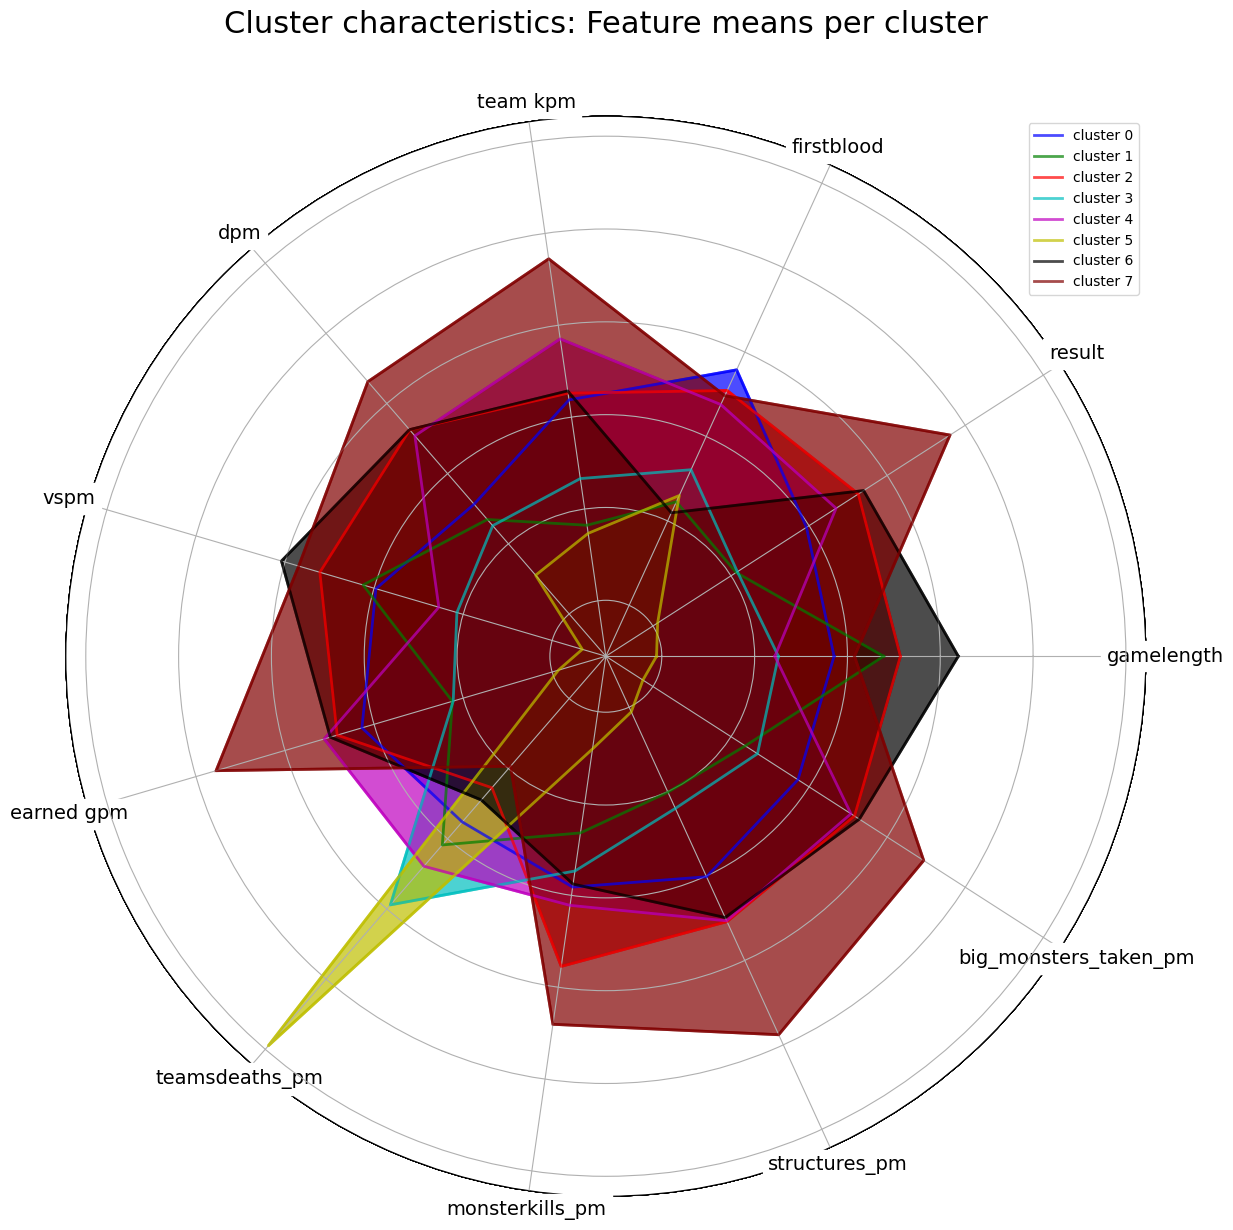

In [169]:
cluster_colors = ['b', 'g', 'r', 'c', "m", "y", "k", "maroon"]

class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)
        
        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])
        
        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)
                     
    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

fig = plt.figure(figsize=(12, 12))
no_features = af2.n_features_in_
radar = Radar(fig, list(df_new.columns), np.unique(af2.labels_))

for k in range(0,len(np.unique(af2.labels_))):
    cluster_data = X_mean_new[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='Cluster {}'.format(k))

radar.ax.legend(loc="upper right")
radar.ax.set_title("Playstyle cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()

## Predictions for every team

In [281]:
df_new_class = df_new

In [282]:
df_new_class = df_new_class.reset_index(level=0)

In [283]:
df_new_class = df_new_class.rename(columns={"index": "team"})

In [284]:
df_new_class

,team,gamelength,result,firstblood,team kpm,dpm,vspm,earned gpm,teamsdeaths_pm,monsterkills_pm,structures_pm,big_monsters_taken_pm
0,Oh My God,1834.6,0.4,0.6,0.44614,2043.13808,7.12850,1154.45535,0.490570,6.138668,0.196228,0.071950
1,ThunderTalk Gaming,1966.0,0.5,0.7,0.37867,1704.09028,7.53575,1144.73546,0.381485,5.844354,0.210580,0.091556
2,FunPlus Phoenix,2064.6,0.5,0.3,0.41308,2040.47225,8.01871,1206.70205,0.430108,6.166812,0.226678,0.092996
3,Royal Never Give Up,1850.6,0.5,0.5,0.49552,2156.41359,7.23357,1163.73887,0.431211,6.270399,0.226953,0.100508
4,JD Gaming,2156.3,0.8,0.5,0.50619,2576.82295,8.16403,1232.11141,0.358948,6.867319,0.275472,0.094607
5,EDward Gaming,2023.4,0.4,0.8,0.34777,2179.15274,8.33267,1133.70429,0.287635,5.844618,0.216467,0.091924
6,LGD Gaming,1981.8,0.5,0.6,0.40874,1950.33779,7.48249,1126.74232,0.396609,5.988495,0.178625,0.078716
7,Anyone's Legend,1800.6,0.0,0.6,0.28382,1949.86274,6.37441,959.48353,0.666445,5.031656,0.043319,0.043319
8,DRX,1980.1,0.3,0.2,0.27438,2021.58241,7.22083,1032.14109,0.415131,6.326953,0.172719,0.066663
9,Liiv SANDBOX,1943.9,0.6,0.7,0.49432,2276.91407,7.24671,1146.41192,0.395082,5.608313,0.219147,0.108030


In [285]:
predictions2 = af2.predict(X_new)

In [286]:
df_new_class = df_new_class.join(pd.DataFrame(predictions2))
df_new_class = df_new_class.rename(columns={0: "cluster"})

In [287]:
df_new_class

,team,gamelength,result,firstblood,team kpm,dpm,vspm,earned gpm,teamsdeaths_pm,monsterkills_pm,structures_pm,big_monsters_taken_pm,cluster
0,Oh My God,1834.6,0.4,0.6,0.44614,2043.13808,7.12850,1154.45535,0.490570,6.138668,0.196228,0.071950,0
1,ThunderTalk Gaming,1966.0,0.5,0.7,0.37867,1704.09028,7.53575,1144.73546,0.381485,5.844354,0.210580,0.091556,0
2,FunPlus Phoenix,2064.6,0.5,0.3,0.41308,2040.47225,8.01871,1206.70205,0.430108,6.166812,0.226678,0.092996,6
3,Royal Never Give Up,1850.6,0.5,0.5,0.49552,2156.41359,7.23357,1163.73887,0.431211,6.270399,0.226953,0.100508,4
4,JD Gaming,2156.3,0.8,0.5,0.50619,2576.82295,8.16403,1232.11141,0.358948,6.867319,0.275472,0.094607,7
5,EDward Gaming,2023.4,0.4,0.8,0.34777,2179.15274,8.33267,1133.70429,0.287635,5.844618,0.216467,0.091924,2
6,LGD Gaming,1981.8,0.5,0.6,0.40874,1950.33779,7.48249,1126.74232,0.396609,5.988495,0.178625,0.078716,0
7,Anyone's Legend,1800.6,0.0,0.6,0.28382,1949.86274,6.37441,959.48353,0.666445,5.031656,0.043319,0.043319,5
8,DRX,1980.1,0.3,0.2,0.27438,2021.58241,7.22083,1032.14109,0.415131,6.326953,0.172719,0.066663,1
9,Liiv SANDBOX,1943.9,0.6,0.7,0.49432,2276.91407,7.24671,1146.41192,0.395082,5.608313,0.219147,0.108030,4


## Current cluster for selected two teams

In [294]:
sel_teams = df_new_class[df_new_class["team"].isin(["G2 Esports", "Top Esports"])]

In [295]:
teams = [row["team"] for index, row in sel_teams.iterrows()]

In [296]:
index_pos = sel_teams.index.tolist()

In [297]:
X_new_sel = pd.DataFrame(X_new).loc[[index_pos[0], index_pos[1]],:]

In [298]:
X_new_sel

,0,1,2,3,4,5,6,7,8,9,10
11,1.706688,1.294213,-0.495837,0.435229,1.184777,0.928023,0.955288,-0.827873,0.338391,0.729998,1.278360
30,-0.775300,1.804854,0.727931,2.190691,1.458105,-0.010915,1.968569,-1.123840,1.383161,2.588307,1.359789


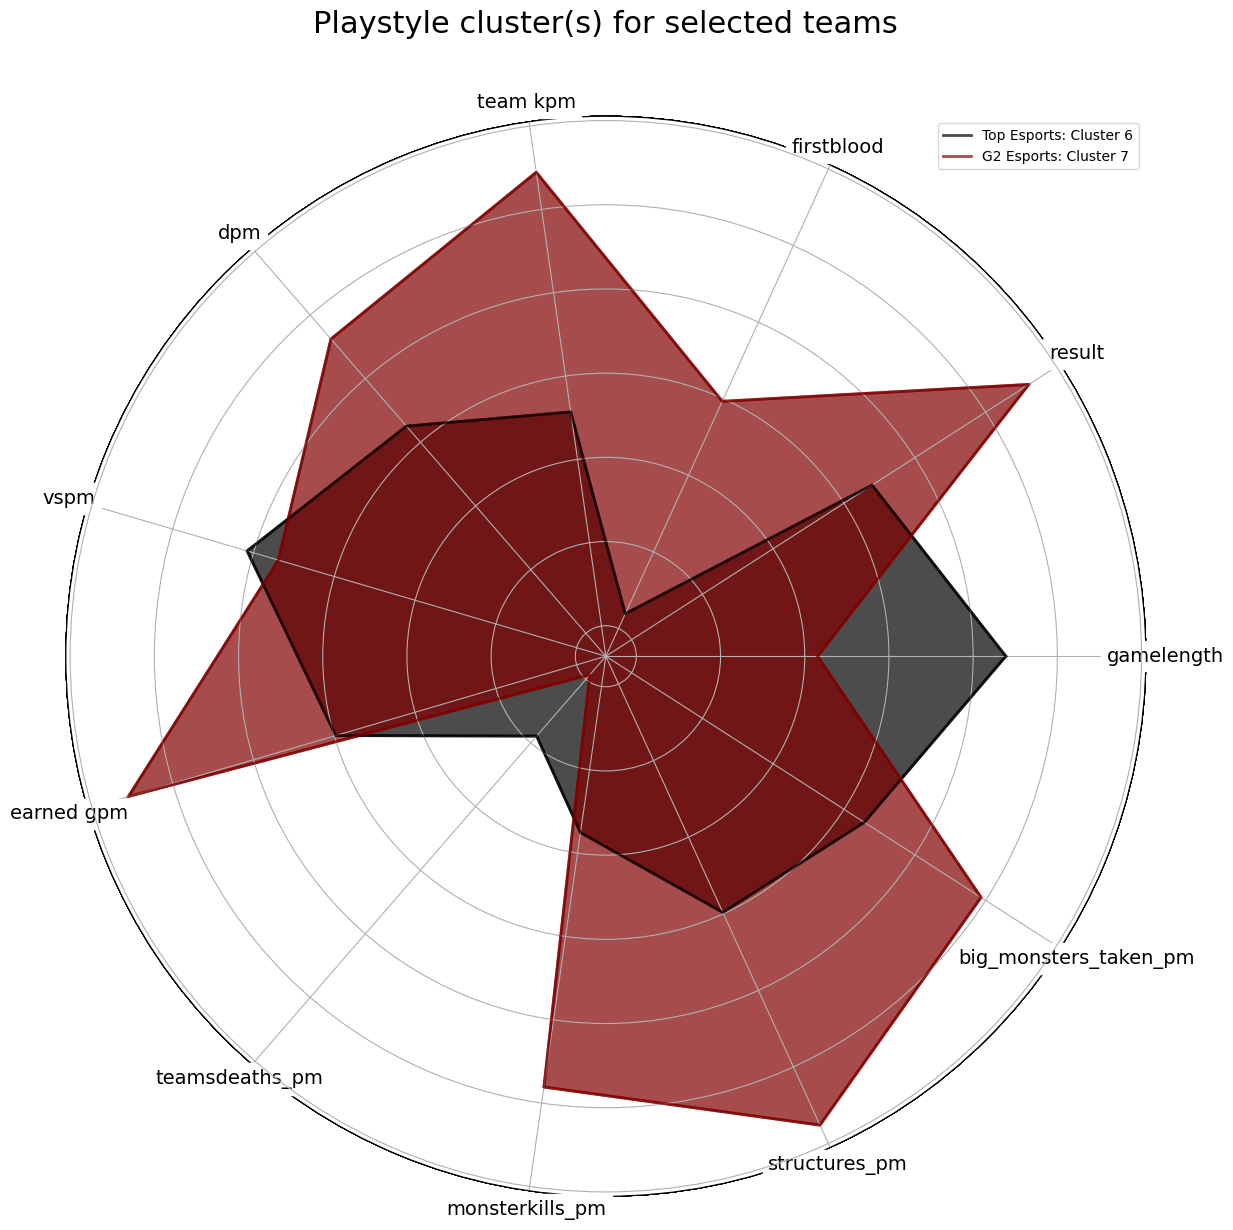

In [299]:
X_new_t = pd.DataFrame(X_new, columns=df_new.columns)
X_new_t["clusters"] = af2.labels_

X_mean_new = pd.concat([pd.DataFrame(X_new_t.mean().drop('clusters'), columns=['mean']), 
                   X_new_t.groupby('clusters').mean().T], axis=1)

fig = plt.figure(figsize=(12, 12))
no_features = af2.n_features_in_
radar = Radar(fig, list(df_new.columns), np.unique(af2.labels_))
location = 0

for k in af2.predict(X_new_sel):
    cluster_data = X_mean_new[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label=f"{teams[location]}: Cluster {k}")
    location += 1

radar.ax.legend(loc="upper right")
radar.ax.set_title("Playstyle cluster(s) for selected teams", size=22, pad=60)
plt.show()